# Exercise on Numpy and Matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")
name = ['hare', 'lynx', 'carrot']

1. Plot the populations for the years in the period. Add legend and axis labels to the plot.

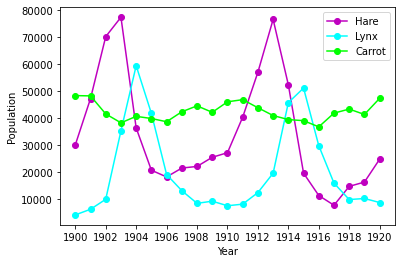

In [8]:
plt.plot(data[:,0], data[:,1], '-o', c = 'm', label='Hare')
plt.plot(data[:,0], data[:,2], '-o', c = 'aqua', label='Lynx')
plt.plot(data[:,0], data[:,3], '-o', c = 'lime', label='Carrot')
plt.xlabel('Year')
plt.xticks(data[:,0][::2])
plt.ylabel('Population')
plt.legend()

2. Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.

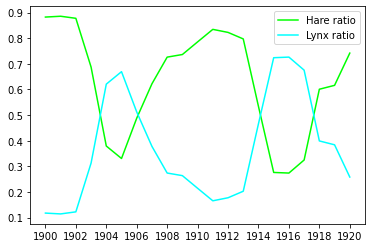

In [9]:
plt.plot(data[:,0], data[:,1] / (data[:,1] + data[:,2]), c = 'lime', label='Hare ratio')
plt.plot(data[:,0], data[:,2] / (data[:,1] + data[:,2]), c = 'aqua', label='Lynx ratio')
plt.xticks(data[:,0][::2])
plt.legend()

3. Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

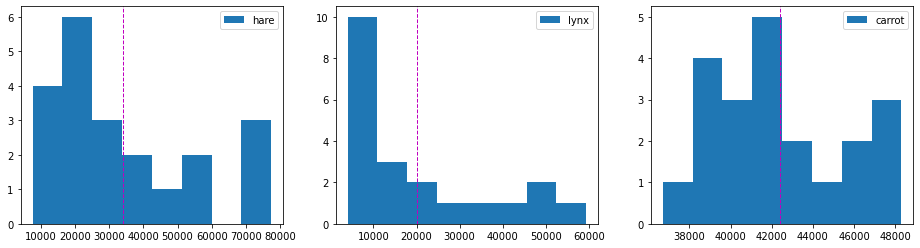

In [13]:
fix, fr = plt.subplots(1, 3, figsize=(16,4))
for i in range(3):
    fr[i].hist(data[:,i + 1], bins=8, label=name[i])
    fr[i].axvline(data[:,i + 1].mean(), c = 'm', linestyle='dashed', linewidth=1)
    fr[i].legend()

4. Find which year each species had the largest population. Mark these years in the plot of populations.

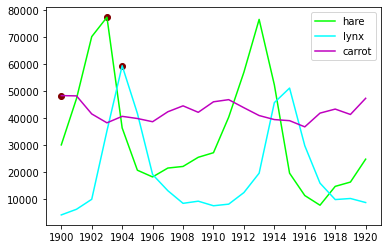

In [21]:
from matplotlib import rcParams
max_idx = np.argmax(data[:,1:], axis=0)
c_1 = 'lime'
c_2 = 'aqua'
c_3 = 'm'
for i in range(3):
    plt.scatter(data[max_idx[i],0], data[max_idx[i], i + 1], c = 'maroon', marker = '.', s=rcParams['lines.markersize'] ** 2 * 4)
    if (i == 0):
        c_i = c_1
    if (i == 1):
        c_i = c_2
    if (i == 2):
        c_i = c_3
    plt.plot(data[:,0], data[:,i + 1], '-', c = c_i, label=name[i])
plt.xticks(data[:,0][::2])
plt.legend()

5. Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing ratio of "H" and "L" values obtained.

([<matplotlib.patches.Wedge at 0x114c69760>,
 [Text(-0.6858388280562521, 0.8600145940217683, 'Hare'),
  Text(0.6858389085766268, -0.860014529808899, 'Lynx')])

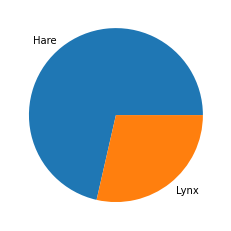

In [23]:
name = ['Hare', 'Lynx', 'Carrot']
max_pie = (data[:,1:3] == data[:,1:3].max(axis=1).reshape(-1, 1)).sum(0)
plt.pie(max_pie, labels=name[:2])

6. Find which years any of the populations is above 50000. Show time periods where populations are above 50000 in the plot of populations.

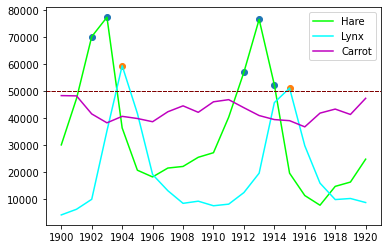

In [24]:
more_50 = data[:,1:] > 50000
c_1 = 'lime'
c_2 = 'aqua'
c_3 = 'm'
for i in range(3):
    plt.scatter(data[more_50[:,i],0], data[more_50[:,i],i + 1])
    if (i == 0):
        c_i = c_1
    if (i == 1):
        c_i = c_2
    if (i == 2):
        c_i = c_3
    plt.plot(data[:,0], data[:,i + 1], '-', c = c_i, label=name[i])
    plt.axhline(50000, color='maroon', linestyle='dashed', linewidth=1)
plt.xticks(data[:,0][::2])
plt.legend()

7. Find the top 2 years for each species when they had the lowest populations.

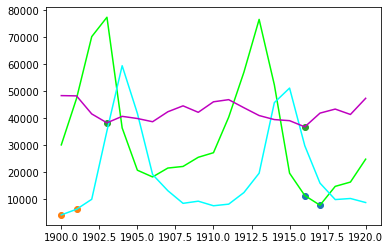

In [26]:
top2min = data[:,1:] <= (np.partition(data[:,1:], 2, axis=0)[2 - 1]).reshape([1,3])
c_1 = 'lime'
c_2 = 'aqua'
c_3 = 'm'
for i in range(3):
    if (i == 0):
        c_i = c_1
    if (i == 1):
        c_i = c_2
    if (i == 2):
        c_i = c_3
    plt.plot(data[:,0], data[:,i + 1], '-', c = c_i, label=name[i])
    plt.scatter(data[top2min[:,i],0], data[top2min[:,i],i + 1])

8. Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

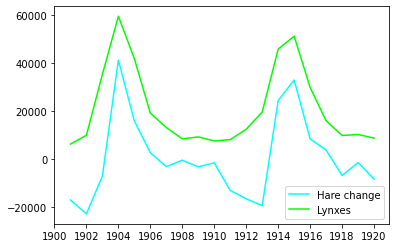

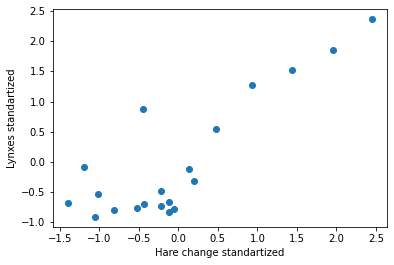

array([[1.        , 0.84948016],
       [0.84948016, 1.        ]])

In [29]:
from scipy.ndimage.interpolation import shift
hare_change = shift(data[:,1], 1)[1:] - data[1:,1]
plt.plot(data[1:,0], hare_change, '-', c = 'aqua', label='Hare change')
plt.plot(data[1:,0], data[1:,2], c = 'lime', label='Lynxes')
plt.legend()
plt.xticks(data[:,0][::2])
plt.show()
plt.scatter((hare_change - hare_change.mean()) / hare_change.std(), (data[1:,2] - data[1:,2].mean()) /  data[1:,2].std())
plt.xlabel('Hare change standartized')
plt.ylabel('Lynxes standartized')
plt.show()
np.corrcoef(hare_change, data[1:,2])

10. Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.

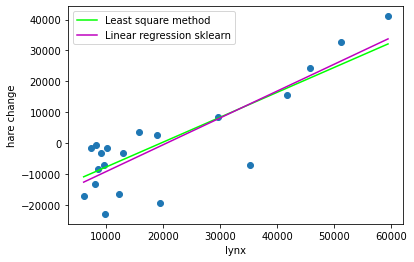

Difference = ~ -444


In [48]:
lynx = data[1:,2]
hare = hare_change
n = len(data)
a = (n * (lynx * hare).sum() - lynx.sum() * hare.sum()) / (n * (lynx ** 2).sum() - (lynx.sum()) ** 2)
b = (hare.sum() - a * lynx.sum()) / n
plt.scatter(lynx, hare)
x = np.array([lynx.min(), lynx.max()])
y = a * x + b
plt.plot(x, y, '-', c = 'lime', label='Least square method')
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(lynx.reshape(-1, 1), hare.reshape(-1, 1))
plt.plot(x, linear.predict(x.reshape(-1, 1)).reshape(-1), c = 'm', label='Linear regression sklearn')
plt.legend()
plt.xlabel('lynx')
plt.ylabel('hare change')
plt.show()

hare_change_1920_mnk = a * lynx[-1] + b
print("Difference = ~ %.f" % (hare_change_1920_mnk - hare[-1]))

# Second part

In [37]:
from sklearn.datasets import fetch_openml
mnist_data = fetch_openml('mnist_784')

In [43]:
from PIL import Image
import requests
from io import BytesIO
from sklearn.decomposition import PCA

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

[82.53939088 88.3309152  91.4564059  93.43972308 94.82121295 95.82752606
 96.61661271 97.2535668  97.7844966  98.22804904 98.60552463 98.92042198
 99.18433356 99.40520362 99.57988149]


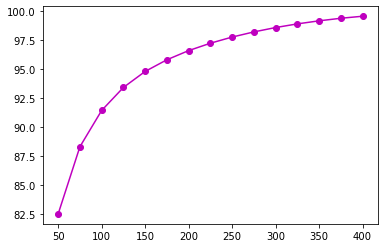

In [44]:
var_list = []
comp_range = np.arange(50, 401, 25)
for i in comp_range:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_data.data.astype(float)) 
    var_list.append(pca.explained_variance_ratio_.sum())
var_list = np.asarray(var_list) * 100
print(var_list)
plt.plot(comp_range, var_list, '-o', c = 'm')
plt.show()

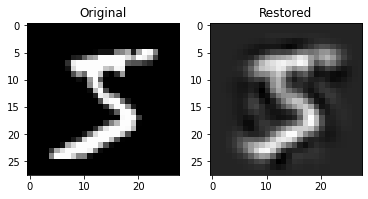

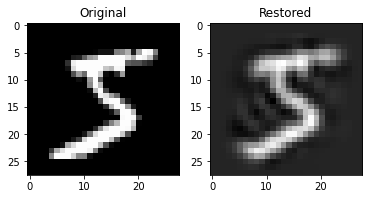

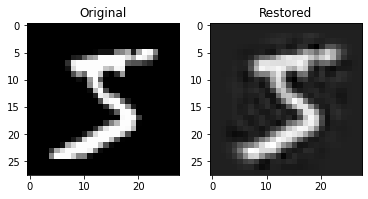

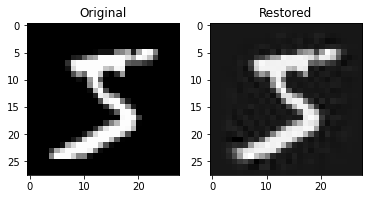

[0.8507970354597424, 0.9002224083181811, 0.949979997459405, 0.990634200588319]

In [46]:
comp_act = [59, 87, 154, 338]
comp_var_list = []
mnist_digits = mnist_data.data.astype(float)
for i in comp_act:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_digits)
    X_restored = pca.inverse_transform(X_transformed[0])
    comp_var_list.append(pca.explained_variance_ratio_.sum())
    fix, fr = plt.subplots(1, 2)
    fr[0].imshow(mnist_digits[0].reshape(28, 28), cmap = 'gray')
    fr[1].imshow(X_restored.reshape(28, 28), cmap = 'gray')
    fr[0].set_title('Original')
    fr[1].set_title('Restored')
    plt.show()
comp_var_list